                                                Exercise 1
                                               Zach Sherman
                                        Argonne National Laboratory

In [1]:
#Plotting and reading in tabular data with Python.
#Import modules
import pyart
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy
%matplotlib inline
from datetime import datetime, timedelta
from io import StringIO
from pytz import timezone
from jdcal import gcal2jd, jd2gcal
import matplotlib.dates as mdates
import datetime as dt
print("pyart.__version__")



C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\pyart\map\grid_mapper.py:40: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  from .ball_tree import BallTree
C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:85: DeprecationWarning: metadata {'config': True} was set from the

pyart.__version__


In [2]:
#Testing in pyart is running correctly.
if pyart.__version__ == "1.6.0":
    if hasattr(pyart.graph, 'RadarMapDisplay'):
        print ("Ready to go")
    else:
        print ("ISSUES\n\nMissing\Broken Basemap\n")
        pyart._debug_info()
else:
    print ("ISSUES\n\nWrong Py-ART version\n")
    pyart._debug_info()

Ready to go


In [3]:
#Import data via urllib.request.
import urllib.request
radar = urllib.request.Request('http://www.atmos.anl.gov/ANLMET/anltower.48')
data = urllib.request.urlopen(radar) 
my_data = np.recfromtxt(data, skip_header = 2)

In [4]:
#Defining columns used for plotting.
#Placing data into an array and coverting to float.
Tdp_10m = np.array(my_data[0:192,9])
Tdp_10m = Tdp_10m.astype(np.float64)
Tdp_10m_max = np.amax(Tdp_10m)
Tdp_10m_min = np.amin(Tdp_10m)

In [5]:
TaC_10m = np.array(my_data[0:192,10])
TaC_10m = TaC_10m.astype(np.float)
TaC_10m_max = np.amax(TaC_10m)
TaC_10m_min = np.amin(TaC_10m)

In [6]:
julian_date = np.array(my_data[0:192,0])
julian_date = julian_date.astype(np.float)


In [7]:
time = np.array(my_data[0:192,1])




In [8]:
#Column stacking time and julian date in order to convert to datetime.
jda_time = np.column_stack((julian_date,time))
jda_time


C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


array([[b'165.0', b'12:00'],
       [b'165.0', b'12:15'],
       [b'165.0', b'12:30'],
       [b'165.0', b'12:45'],
       [b'165.0', b'13:00'],
       [b'165.0', b'13:15'],
       [b'165.0', b'13:30'],
       [b'165.0', b'13:45'],
       [b'165.0', b'14:00'],
       [b'165.0', b'14:15'],
       [b'165.0', b'14:30'],
       [b'165.0', b'14:45'],
       [b'165.0', b'15:00'],
       [b'165.0', b'15:15'],
       [b'165.0', b'15:30'],
       [b'165.0', b'15:45'],
       [b'165.0', b'16:00'],
       [b'165.0', b'16:15'],
       [b'165.0', b'16:30'],
       [b'165.0', b'16:45'],
       [b'165.0', b'17:00'],
       [b'165.0', b'17:15'],
       [b'165.0', b'17:30'],
       [b'165.0', b'17:45'],
       [b'165.0', b'18:00'],
       [b'165.0', b'18:15'],
       [b'165.0', b'18:30'],
       [b'165.0', b'18:45'],
       [b'165.0', b'19:00'],
       [b'165.0', b'19:15'],
       [b'165.0', b'19:30'],
       [b'165.0', b'19:45'],
       [b'165.0', b'20:00'],
       [b'165.0', b'20:15'],
       [b'165.

In [9]:
#Creating a datetime object using a for loop.
jda_time = (jda_time)
base = datetime(2016, 1, 1, 0, 0, 0, 0)
transformed = [base + timedelta(days=int(float(x)-1), hours=int(y[0:2]), minutes=int(y[3:5])) for x, y in jda_time]
datetime_array = np.array(transformed)
datetime_array

array([datetime.datetime(2016, 6, 13, 12, 0),
       datetime.datetime(2016, 6, 13, 12, 15),
       datetime.datetime(2016, 6, 13, 12, 30),
       datetime.datetime(2016, 6, 13, 12, 45),
       datetime.datetime(2016, 6, 13, 13, 0),
       datetime.datetime(2016, 6, 13, 13, 15),
       datetime.datetime(2016, 6, 13, 13, 30),
       datetime.datetime(2016, 6, 13, 13, 45),
       datetime.datetime(2016, 6, 13, 14, 0),
       datetime.datetime(2016, 6, 13, 14, 15),
       datetime.datetime(2016, 6, 13, 14, 30),
       datetime.datetime(2016, 6, 13, 14, 45),
       datetime.datetime(2016, 6, 13, 15, 0),
       datetime.datetime(2016, 6, 13, 15, 15),
       datetime.datetime(2016, 6, 13, 15, 30),
       datetime.datetime(2016, 6, 13, 15, 45),
       datetime.datetime(2016, 6, 13, 16, 0),
       datetime.datetime(2016, 6, 13, 16, 15),
       datetime.datetime(2016, 6, 13, 16, 30),
       datetime.datetime(2016, 6, 13, 16, 45),
       datetime.datetime(2016, 6, 13, 17, 0),
       datetime.dat

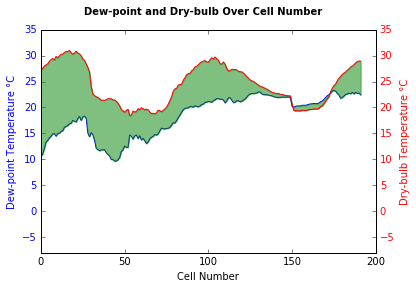

In [10]:
#Plot dew-point and dry-bulb over cell number.
fig, ax1 = plt.subplots()
fig.suptitle('Dew-point and Dry-bulb Over Cell Number', fontsize=10, fontweight='bold')
y1 = Tdp_10m
ax1.plot(y1, 'b-')
ax1.set_xlabel('Cell Number')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Dew-point Temperature °C', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
plt.ylim((-8,35))
x = np.arange(0, 192)

ax2 = ax1.twinx()
y2 = TaC_10m
ax2.plot(y2, 'r-')
ax2.set_ylabel('Dry-bulb Temperature °C', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.ylim((-8,35))
plt.fill_between(x, y1, y2, color='green', alpha='0.5')
plt.show()

In [11]:
#Displaying maximum and minimum dewpoint and drybulb temperatures.
print('Maximum dew-point temperature = %f'%(Tdp_10m_max))
print('Minimum dew-point temperature = %f'%(Tdp_10m_min))
print('Maximum dry-bulb temperature = %f'%(TaC_10m_max))
print('Minimum dry-bulb temperature = %f'%(TaC_10m_min))

Maximum dew-point temperature = 23.250000
Minimum dew-point temperature = 9.640000
Maximum dry-bulb temperature = 30.980000
Minimum dry-bulb temperature = 18.430000


C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\dateutil\rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\dateutil\rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\dateutil\rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\dateutil\rrule.py:470: DeprecationWarning: Usin

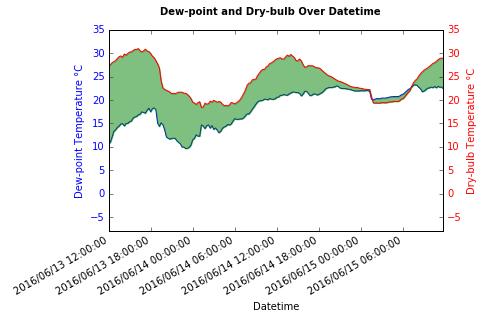

In [12]:
#Plot dew-point and dry-bulb over datetime.

fig, ax1 = plt.subplots()
fig.suptitle('Dew-point and Dry-bulb Over Datetime', fontsize=10, fontweight='bold')
x = np.array(datetime_array)
y1 = Tdp_10m
y2 = TaC_10m
ax1.set_xlabel('Datetime')
ax1.plot(x, y1, 'b-')
ax1.set_ylabel('Dew-point Temperature °C', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
plt.ylim((-8,35))

ax2 = ax1.twinx()

ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Dry-bulb Temperature °C', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.ylim((-8,35))


x_lims = (datetime_array)

# Converting datetime.datetime objects to the correct format for matplotlib to work with.
date_format = mdates.DateFormatter('%Y/%m/%d %H:%M:%S')
x_lims = mdates.date2num(x_lims)
ax1.xaxis_date()

# Using DateFormatter to choose how datetime string will appear.


ax1.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()  

ax1.annotate('local max', xy=(3, 1), xycoords='data',
                xytext=(0.8, 0.95), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='right', verticalalignment='top')
                

plt.fill_between(x, y1, y2, color='green', alpha='0.5')

plt.show()
